In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline

### 0. Описание задачи
В астрономии звездная классификация — это классификация звезд на основе их спектральных характеристик.В данной задаче производится классификация звезд, галактик и квазаров на основе их спектральных характеристик.

Данные состоят из 100 000 наблюдений за космосом, сделанных SDSS (Sloan Digital Sky Survey). Каждое наблюдение описывается 17 столбцами признаков и 1 столбцом класса, который идентифицирует его как звезду, галактику или квазар. Ниже представлено описание этих характеристик:
1. obj_ID - идентификатор объекта, уникальное значение, идентифицирующее объект в каталоге изображений, используемом CAS.
2. alpha - угол прямого восхождения
3. delta - угол склонения
4. u - Ультрафиолетовый фильтр в фотометрической системе
5. g - Зеленый фильтр в фотометрической системе
6. r - красный фильтр в фотометрической системе
7. i - фильтр ближнего инфракрасного диапазона в фотометрической системе
8. z - инфракрасный фильтр в фотометрической системе
9. run_ID - номер запуска, используемый для идентификации конкретного сканирования.
10. rereun_ID - Номер повтора, чтобы указать, как было обработано изображение.
11. cam_col - Столбец камеры для идентификации строки сканирования в рамках прогона
12. field_ID - номер поля для идентификации каждого поля
13. spec_obj_ID - уникальный идентификатор, используемый для оптических спектроскопических объектов (это означает, что 2 разных наблюдения с одним и тем же spec_obj_ID должны иметь общий выходной класс)
14. class - класс объекта (объект галактика, звезда или квазар)
15. redshift - значение красного смещения, основанное на увеличении длины волны
16. plate - идентификатор номерного знака, идентифицирует каждый номерной знак в SDSS.
17. MJD - модифицированная юлианская дата, используемая для указания того, когда был взят данный фрагмент данных SDSS.
18. fibre_ID - идентификатор волокна, который идентифицирует волокно, направляющее свет в фокальную плоскость в каждом наблюдении.

### 1. Читаем данные

In [3]:
url = "https://raw.githubusercontent.com/AlisaBugaeva/ML_labs/main/star_classification.csv"
data_input = pd.read_csv(url)

Чтобы проверит, что все данные считались верно, выведем тип данных, количество строк и столбцов в таблиуе и саму таблицу.

In [4]:
type(data_input)

pandas.core.frame.DataFrame

In [5]:
data_input.shape

(100000, 18)

In [6]:
data_input

obj_ID       alpha      delta         u         g         r  \
0      1.237661e+18  135.689107  32.494632  23.87882  22.27530  20.39501   
1      1.237665e+18  144.826101  31.274185  24.77759  22.83188  22.58444   
2      1.237661e+18  142.188790  35.582444  25.26307  22.66389  20.60976   
3      1.237663e+18  338.741038  -0.402828  22.13682  23.77656  21.61162   
4      1.237680e+18  345.282593  21.183866  19.43718  17.58028  16.49747   
...             ...         ...        ...       ...       ...       ...   
99995  1.237679e+18   39.620709  -2.594074  22.16759  22.97586  21.90404   
99996  1.237679e+18   29.493819  19.798874  22.69118  22.38628  20.45003   
99997  1.237668e+18  224.587407  15.700707  21.16916  19.26997  18.20428   
99998  1.237661e+18  212.268621  46.660365  25.35039  21.63757  19.91386   
99999  1.237661e+18  196.896053  49.464643  22.62171  21.79745  20.60115   

              i         z  run_ID  rerun_ID  cam_col  field_ID   spec_obj_ID  \
0      19.16573  18.79371    3606       301        2        79  6.543777e+18   
1      21.16812  21.61427    4518       301        5       119  1.176014e+19   
2      19.34857  18.94827    3606       301        2       120  5.152200e+18   
3      20.50454  19.25010    4192       301        3       214  1.030107e+19   
4      15.97711  15.54461    8102       301        3       137  6.891865e+18   
...         ...       ...     ...       ...      ...       ...           ...   
99995  21.30548  20.73569    7778       301        2       581  1.055431e+19   
99996  19.75759  19.41526    7917       301        1       289  8.586351e+18   
99997  17.69034  17.35221    5314       301        4       308  3.112008e+18   
99998  19.07254  18.62482    3650       301        4       131  7.601080e+18   
99999  20.00959  19.28075    3650       301        4        60  8.343152e+18   

        class  redshift  plate    MJD  fiber_ID  
0      GALAXY  0.634794   5812  56354       171  
1      GALAXY  0.779136  10445  58158       427  
2      GALAXY  0.644195   4576  55592       299  
3      GALAXY  0.932346   9149  58039       775  
4      GALAXY  0.116123   6121  56187       842  
...       ...       ...    ...    ...       ...  
99995  GALAXY  0.000000   9374  57749       438  
99996  GALAXY  0.404895   7626  56934       866  
99997  GALAXY  0.143366   2764  54535        74  
99998  GALAXY  0.455040   6751  56368       470  
99999  GALAXY  0.542944   7410  57104       851  

[100000 rows x 18 columns]

Можно заметить, что в столбце rerun_ID все значения одинаковы, поэтому его можно удалить за ненадобностью.

In [7]:
data_input['rerun_ID'].unique()

array([301])

In [8]:
data = data_input.drop('rerun_ID', axis = 1)
data

obj_ID       alpha      delta         u         g         r  \
0      1.237661e+18  135.689107  32.494632  23.87882  22.27530  20.39501   
1      1.237665e+18  144.826101  31.274185  24.77759  22.83188  22.58444   
2      1.237661e+18  142.188790  35.582444  25.26307  22.66389  20.60976   
3      1.237663e+18  338.741038  -0.402828  22.13682  23.77656  21.61162   
4      1.237680e+18  345.282593  21.183866  19.43718  17.58028  16.49747   
...             ...         ...        ...       ...       ...       ...   
99995  1.237679e+18   39.620709  -2.594074  22.16759  22.97586  21.90404   
99996  1.237679e+18   29.493819  19.798874  22.69118  22.38628  20.45003   
99997  1.237668e+18  224.587407  15.700707  21.16916  19.26997  18.20428   
99998  1.237661e+18  212.268621  46.660365  25.35039  21.63757  19.91386   
99999  1.237661e+18  196.896053  49.464643  22.62171  21.79745  20.60115   

              i         z  run_ID  cam_col  field_ID   spec_obj_ID   class  \
0      19.16573  18.79371    3606        2        79  6.543777e+18  GALAXY   
1      21.16812  21.61427    4518        5       119  1.176014e+19  GALAXY   
2      19.34857  18.94827    3606        2       120  5.152200e+18  GALAXY   
3      20.50454  19.25010    4192        3       214  1.030107e+19  GALAXY   
4      15.97711  15.54461    8102        3       137  6.891865e+18  GALAXY   
...         ...       ...     ...      ...       ...           ...     ...   
99995  21.30548  20.73569    7778        2       581  1.055431e+19  GALAXY   
99996  19.75759  19.41526    7917        1       289  8.586351e+18  GALAXY   
99997  17.69034  17.35221    5314        4       308  3.112008e+18  GALAXY   
99998  19.07254  18.62482    3650        4       131  7.601080e+18  GALAXY   
99999  20.00959  19.28075    3650        4        60  8.343152e+18  GALAXY   

       redshift  plate    MJD  fiber_ID  
0      0.634794   5812  56354       171  
1      0.779136  10445  58158       427  
2      0.644195   4576  55592       299  
3      0.932346   9149  58039       775  
4      0.116123   6121  56187       842  
...         ...    ...    ...       ...  
99995  0.000000   9374  57749       438  
99996  0.404895   7626  56934       866  
99997  0.143366   2764  54535        74  
99998  0.455040   6751  56368       470  
99999  0.542944   7410  57104       851  

[100000 rows x 17 columns]

Рассмотрим типы оставшихся 17 столбцов.

In [9]:
data.columns

Index(['obj_ID', 'alpha', 'delta', 'u', 'g', 'r', 'i', 'z', 'run_ID',
       'cam_col', 'field_ID', 'spec_obj_ID', 'class', 'redshift', 'plate',
       'MJD', 'fiber_ID'],
      dtype='object')

In [10]:
data.dtypes

obj_ID         float64
alpha          float64
delta          float64
u              float64
g              float64
r              float64
i              float64
z              float64
run_ID           int64
cam_col          int64
field_ID         int64
spec_obj_ID    float64
class           object
redshift       float64
plate            int64
MJD              int64
fiber_ID         int64
dtype: object

Поменяем тип столбца класс с типа object на тип category.

In [11]:
data['class'] = data['class'].astype('category')

In [12]:
data.dtypes

obj_ID          float64
alpha           float64
delta           float64
u               float64
g               float64
r               float64
i               float64
z               float64
run_ID            int64
cam_col           int64
field_ID          int64
spec_obj_ID     float64
class          category
redshift        float64
plate             int64
MJD               int64
fiber_ID          int64
dtype: object

### 2. Визуализация данных и вычисление основных характеристик.

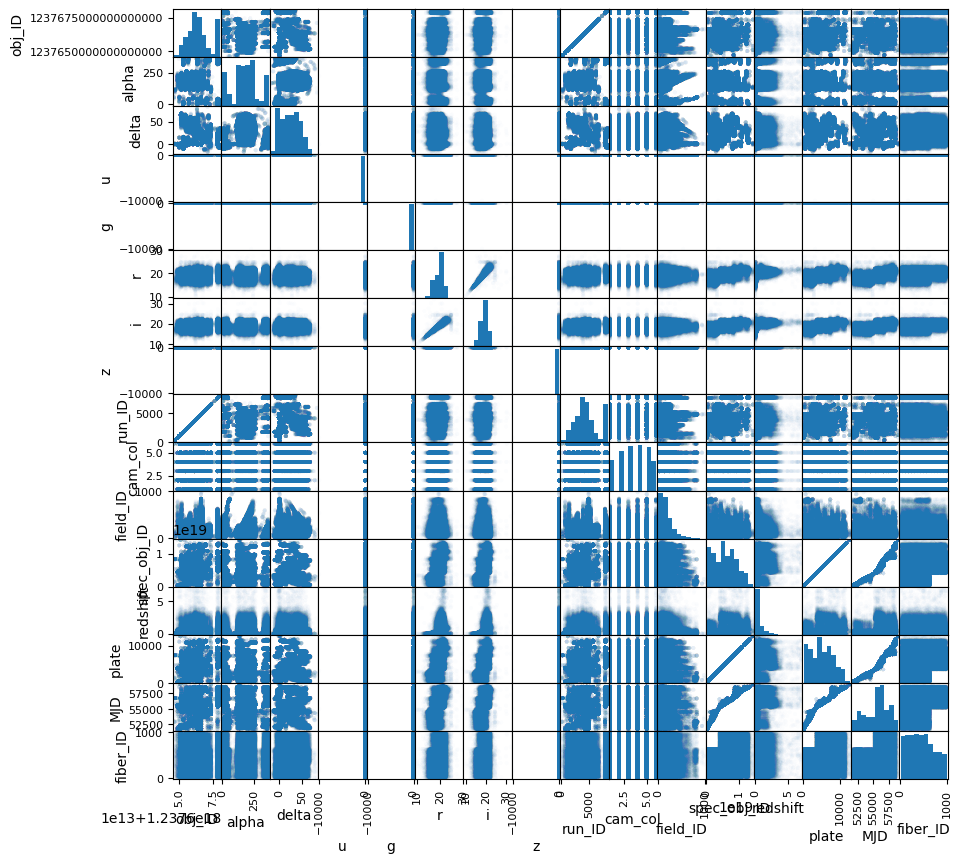

In [ ]:
from pandas.plotting import scatter_matrix
scatter_matrix(data, alpha = .01, figsize = (10, 10))
pass

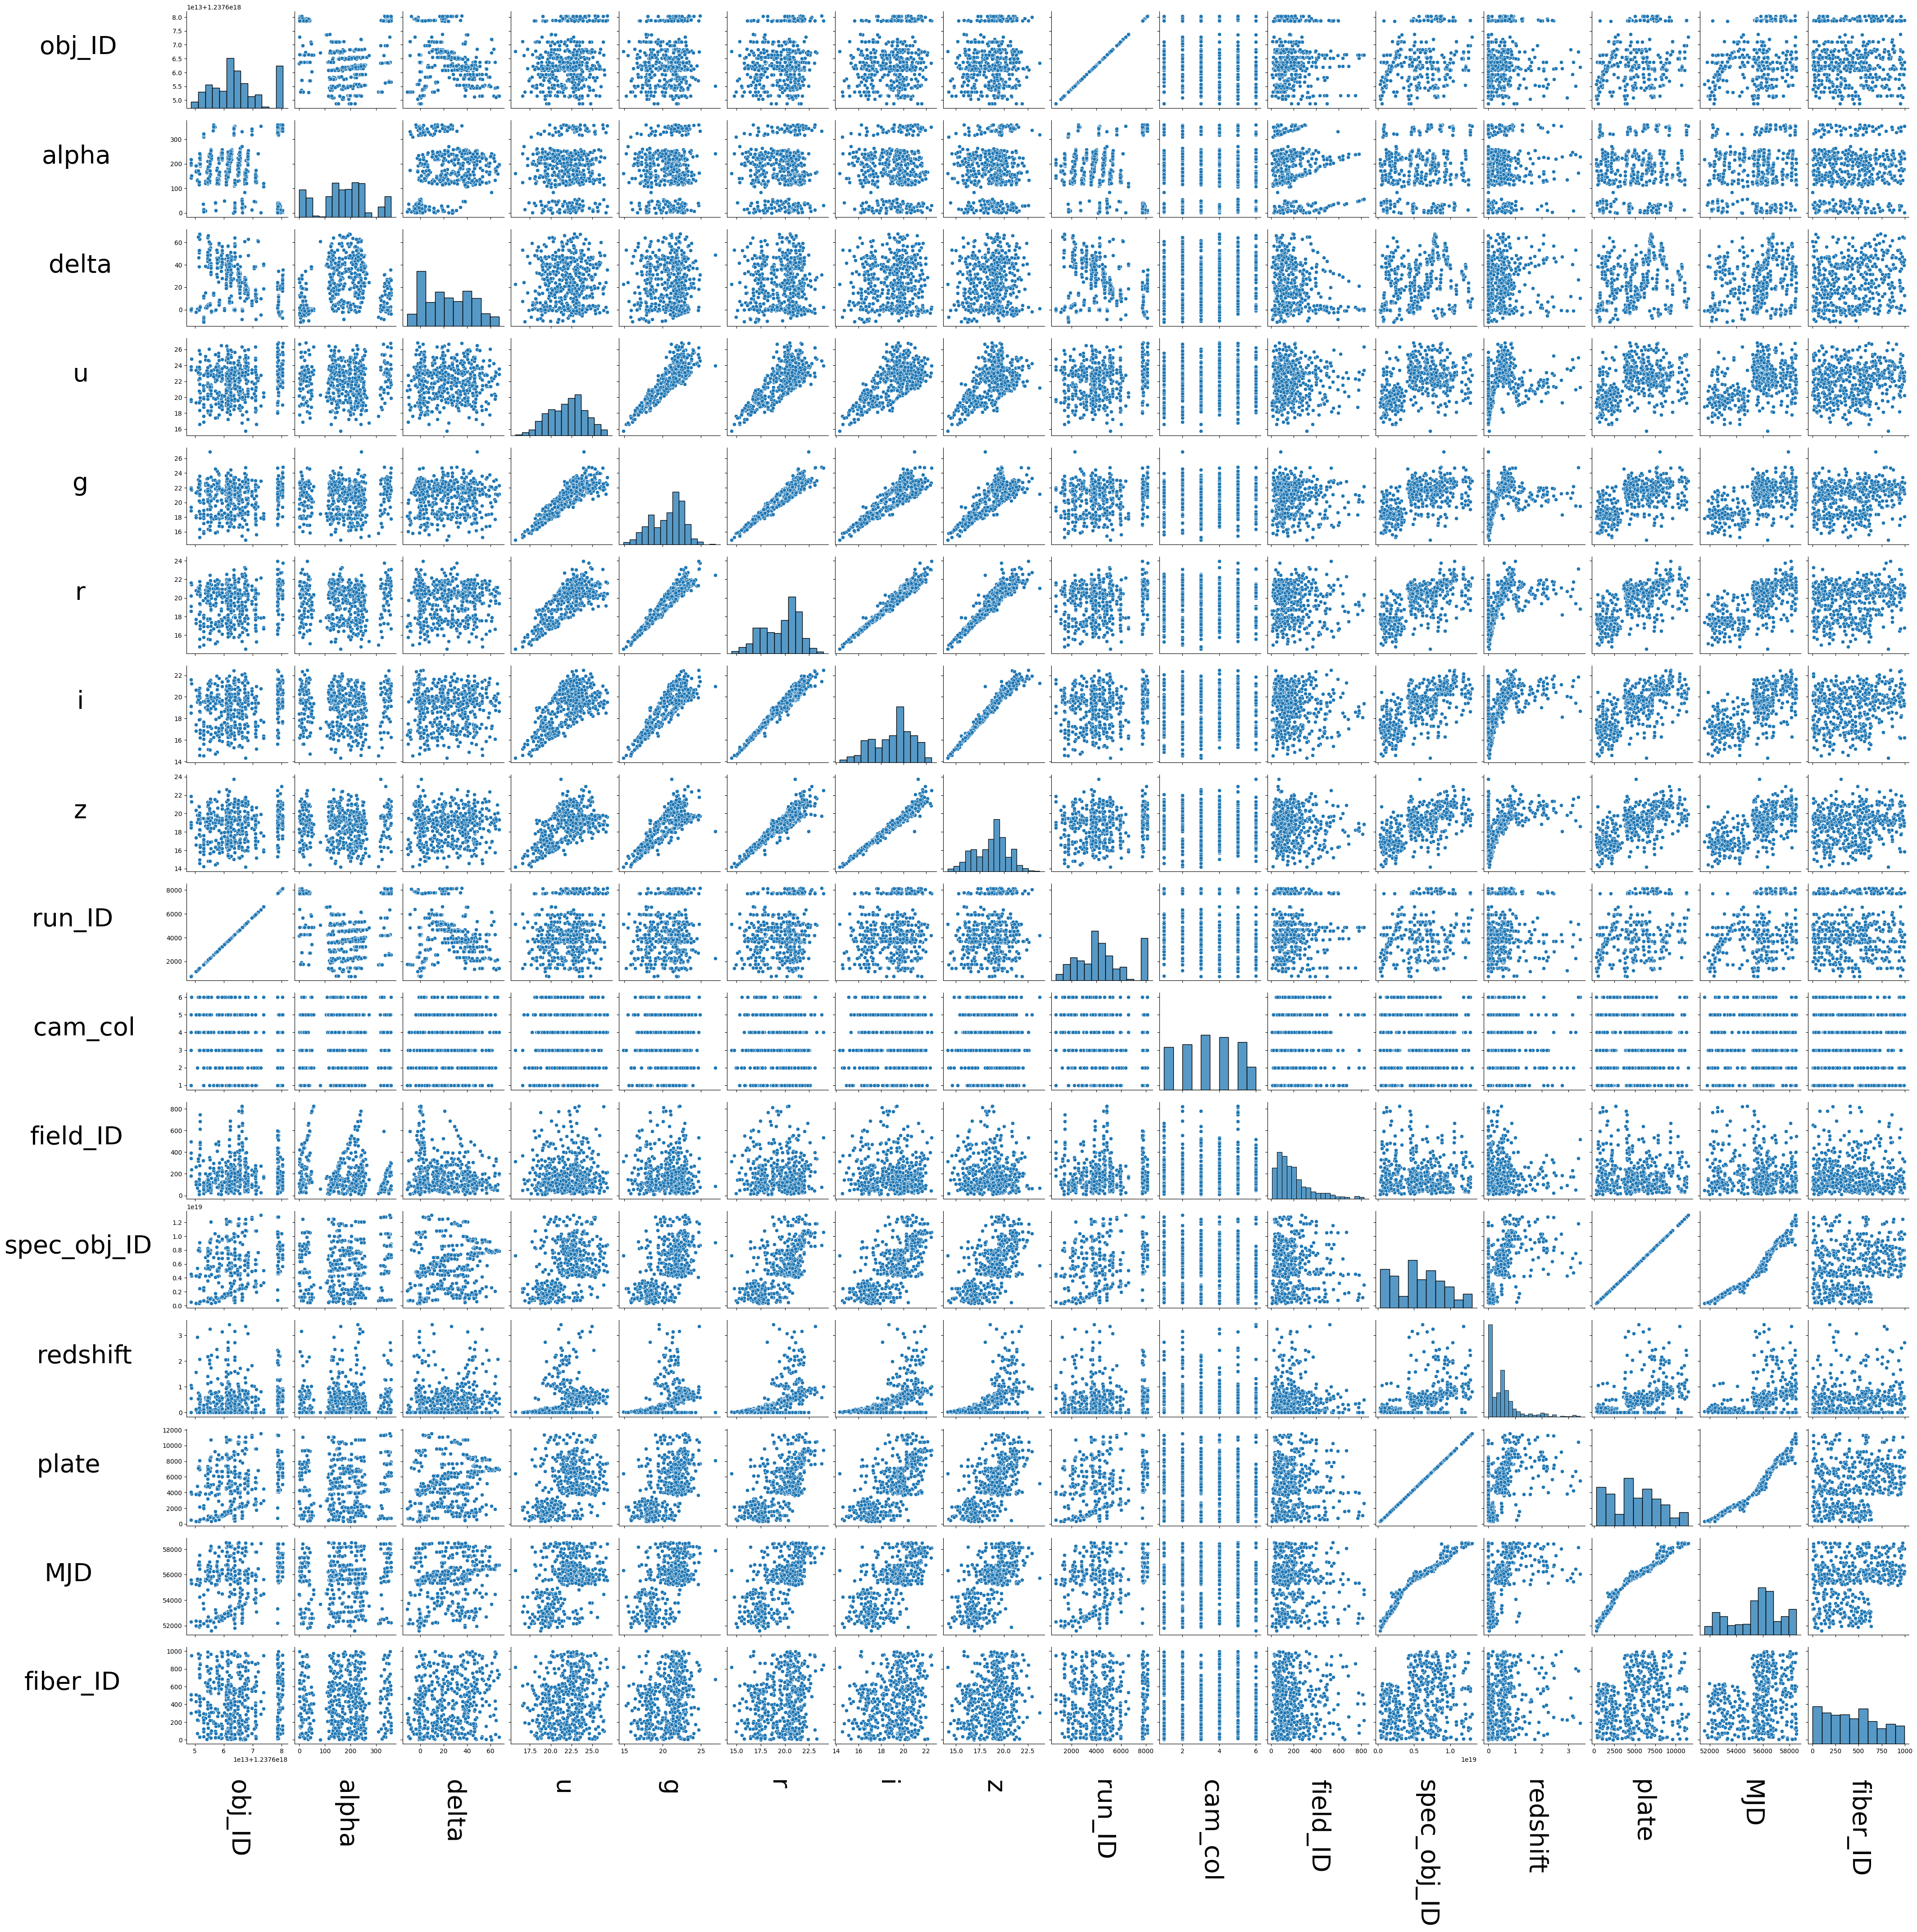

In [ ]:
np.random.seed(42)
random_subset = np.random.choice(np.arange(data.shape[0]), size=500, replace=False)
g = sns.pairplot(data.iloc[random_subset], diag_kind='hist')
for ax in g.axes.flatten() :
    ax.set_xlabel(ax.get_xlabel(), rotation = -90, fontsize = 40, labelpad = 40)
    ax.set_ylabel(ax.get_ylabel(), rotation = 0, fontsize = 40, labelpad = 150)
pass

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 17 columns):
 #   Column       Non-Null Count   Dtype   
---  ------       --------------   -----   
 0   obj_ID       100000 non-null  float64 
 1   alpha        100000 non-null  float64 
 2   delta        100000 non-null  float64 
 3   u            100000 non-null  float64 
 4   g            100000 non-null  float64 
 5   r            100000 non-null  float64 
 6   i            100000 non-null  float64 
 7   z            100000 non-null  float64 
 8   run_ID       100000 non-null  int64   
 9   cam_col      100000 non-null  int64   
 10  field_ID     100000 non-null  int64   
 11  spec_obj_ID  100000 non-null  float64 
 12  class        100000 non-null  category
 13  redshift     100000 non-null  float64 
 14  plate        100000 non-null  int64   
 15  MJD          100000 non-null  int64   
 16  fiber_ID     100000 non-null  int64   
dtypes: category(1), float64(10), int64(6)
memory usag

Выведем сводную информацию о числовых признаках, где:
- count - количество значений
- mean - среднее значение
- std - стандартное отклонение
- min - минимальное значение
- max - максимальное значение
- 25% - первый квартиль
- 50% - медиана
- 75% - третий квартиль

In [14]:
data.describe()

obj_ID          alpha          delta              u  \
count  1.000000e+05  100000.000000  100000.000000  100000.000000   
mean   1.237665e+18     177.629117      24.135305      21.980468   
std    8.438560e+12      96.502241      19.644665      31.769291   
min    1.237646e+18       0.005528     -18.785328   -9999.000000   
25%    1.237659e+18     127.518222       5.146771      20.352353   
50%    1.237663e+18     180.900700      23.645922      22.179135   
75%    1.237668e+18     233.895005      39.901550      23.687440   
max    1.237681e+18     359.999810      83.000519      32.781390   

                   g              r              i              z  \
count  100000.000000  100000.000000  100000.000000  100000.000000   
mean       20.531387      19.645762      19.084854      18.668810   
std        31.750292       1.854760       1.757895      31.728152   
min     -9999.000000       9.822070       9.469903   -9999.000000   
25%        18.965230      18.135828      17.732285      17.460677   
50%        21.099835      20.125290      19.405145      19.004595   
75%        22.123767      21.044785      20.396495      19.921120   
max        31.602240      29.571860      32.141470      29.383740   

              run_ID        cam_col       field_ID   spec_obj_ID  \
count  100000.000000  100000.000000  100000.000000  1.000000e+05   
mean     4481.366060       3.511610     186.130520  5.783882e+18   
std      1964.764593       1.586912     149.011073  3.324016e+18   
min       109.000000       1.000000      11.000000  2.995191e+17   
25%      3187.000000       2.000000      82.000000  2.844138e+18   
50%      4188.000000       4.000000     146.000000  5.614883e+18   
75%      5326.000000       5.000000     241.000000  8.332144e+18   
max      8162.000000       6.000000     989.000000  1.412694e+19   

            redshift          plate            MJD       fiber_ID  
count  100000.000000  100000.000000  100000.000000  100000.000000  
mean        0.576661    5137.009660   55588.647500     449.312740  
std         0.730707    2952.303351    1808.484233     272.498404  
min        -0.009971     266.000000   51608.000000       1.000000  
25%         0.054517    2526.000000   54234.000000     221.000000  
50%         0.424173    4987.000000   55868.500000     433.000000  
75%         0.704154    7400.250000   56777.000000     645.000000  
max         7.011245   12547.000000   58932.000000    1000.000000

Отдельно выведем информацию о поле class типа category, где:
- count - количество значений
- unique - количество уникальных значений
- top - наиболее часто встречающееся значение
- freq - сколько раз встречается значение top

In [15]:
data.describe(include=['category'])

class
count   100000
unique       3
top     GALAXY
freq     59445

Теперь вычислим матрицу корреляции для числовых призаков и визуализируем её.

In [16]:
corr_matrix = data.corr()
corr_matrix

<ipython-input-16-b20f780b4413>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = data.corr()


obj_ID     alpha     delta         u         g         r  \
obj_ID       1.000000 -0.013735 -0.301237  0.015310  0.015710  0.153891   
alpha       -0.013735  1.000000  0.138691 -0.001532 -0.002423 -0.022083   
delta       -0.301237  0.138691  1.000000  0.002074  0.003523 -0.006835   
u            0.015310 -0.001532  0.002074  1.000000  0.999311  0.054149   
g            0.015710 -0.002423  0.003523  0.999311  1.000000  0.062387   
r            0.153891 -0.022083 -0.006835  0.054149  0.062387  1.000000   
i            0.147670 -0.023580 -0.004480  0.045730  0.056271  0.962868   
z            0.013811 -0.002918  0.003630  0.998093  0.999161  0.053677   
run_ID       1.000000 -0.013737 -0.301238  0.015309  0.015710  0.153889   
cam_col     -0.046997  0.019582  0.032565  0.003548  0.003508  0.008480   
field_ID     0.031498 -0.165577 -0.173416 -0.008374 -0.008852 -0.026423   
spec_obj_ID  0.239461 -0.002553  0.112329  0.029997  0.039443  0.655245   
redshift     0.065400  0.001667  0.031638  0.014309  0.022954  0.433241   
plate        0.239460 -0.002554  0.112329  0.029997  0.039443  0.655243   
MJD          0.262687  0.019943  0.107333  0.031997  0.040274  0.671180   
fiber_ID     0.067178  0.030464  0.028250  0.016305  0.017470  0.223106   

                    i         z    run_ID   cam_col  field_ID  spec_obj_ID  \
obj_ID       0.147670  0.013811  1.000000 -0.046997  0.031498     0.239461   
alpha       -0.023580 -0.002918 -0.013737  0.019582 -0.165577    -0.002553   
delta       -0.004480  0.003630 -0.301238  0.032565 -0.173416     0.112329   
u            0.045730  0.998093  0.015309  0.003548 -0.008374     0.029997   
g            0.056271  0.999161  0.015710  0.003508 -0.008852     0.039443   
r            0.962868  0.053677  0.153889  0.008480 -0.026423     0.655245   
i            1.000000  0.055994  0.147668  0.007615 -0.026679     0.661641   
z            0.055994  1.000000  0.013811  0.003365 -0.008903     0.037813   
run_ID       0.147668  0.013811  1.000000 -0.047098  0.031498     0.239460   
cam_col      0.007615  0.003365 -0.047098  1.000000 -0.015684    -0.001946   
field_ID    -0.026679 -0.008903  0.031498 -0.015684  1.000000    -0.083471   
spec_obj_ID  0.661641  0.037813  0.239460 -0.001946 -0.083471     1.000000   
redshift     0.492383  0.030380  0.065400  0.000097 -0.021331     0.388642   
plate        0.661640  0.037813  0.239459 -0.001949 -0.083471     1.000000   
MJD          0.672523  0.037469  0.262687 -0.006745 -0.095064     0.970167   
fiber_ID     0.214787  0.014668  0.067165  0.121597 -0.012337     0.241279   

             redshift     plate       MJD  fiber_ID  
obj_ID       0.065400  0.239460  0.262687  0.067178  
alpha        0.001667 -0.002554  0.019943  0.030464  
delta        0.031638  0.112329  0.107333  0.028250  
u            0.014309  0.029997  0.031997  0.016305  
g            0.022954  0.039443  0.040274  0.017470  
r            0.433241  0.655243  0.671180  0.223106  
i            0.492383  0.661640  0.672523  0.214787  
z            0.030380  0.037813  0.037469  0.014668  
run_ID       0.065400  0.239459  0.262687  0.067165  
cam_col      0.000097 -0.001949 -0.006745  0.121597  
field_ID    -0.021331 -0.083471 -0.095064 -0.012337  
spec_obj_ID  0.388642  1.000000  0.970167  0.241279  
redshift     1.000000  0.388641  0.387109  0.127044  
plate        0.388641  1.000000  0.970166  0.241258  
MJD          0.387109  0.970166  1.000000  0.256970  
fiber_ID     0.127044  0.241258  0.256970  1.000000

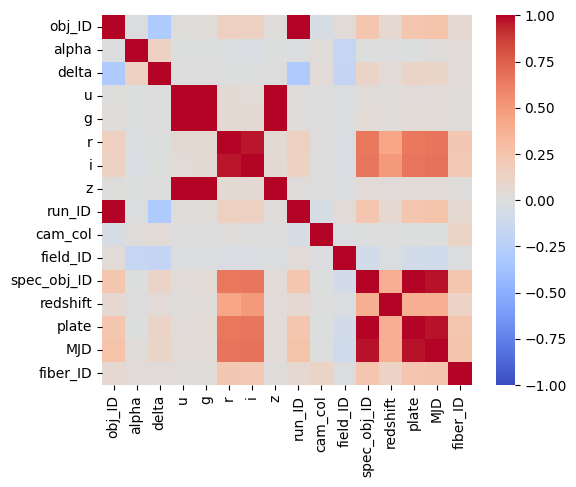

In [17]:
sns.heatmap(corr_matrix, square=True, cmap='coolwarm', vmin=-1.0, vmax=1.0)
pass

Посмотрим, на сколько наши выходные классы несбалансированны.

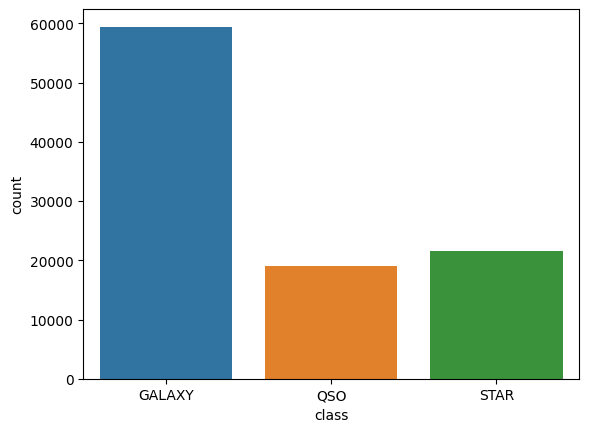

In [18]:
sns.countplot(x='class', data=data)
pass

### 3. Обработка пропущенных значений
Убедимся, что в наших данных нет пропущенных значений

In [19]:
data.isna().sum()

obj_ID         0
alpha          0
delta          0
u              0
g              0
r              0
i              0
z              0
run_ID         0
cam_col        0
field_ID       0
spec_obj_ID    0
class          0
redshift       0
plate          0
MJD            0
fiber_ID       0
dtype: int64

### 4. Обработка категориальных признаков
Заменим текстовые значения названий классов на цифры от 0 до 2 соответственно, где:
- GALAXY - 0
- QSO - 1
- STAR - 2

In [20]:
data['class'] = pd.factorize(data['class'])[0]

In [21]:
data.head(20)

obj_ID       alpha      delta         u         g         r  \
0   1.237661e+18  135.689107  32.494632  23.87882  22.27530  20.39501   
1   1.237665e+18  144.826101  31.274185  24.77759  22.83188  22.58444   
2   1.237661e+18  142.188790  35.582444  25.26307  22.66389  20.60976   
3   1.237663e+18  338.741038  -0.402828  22.13682  23.77656  21.61162   
4   1.237680e+18  345.282593  21.183866  19.43718  17.58028  16.49747   
5   1.237680e+18  340.995121  20.589476  23.48827  23.33776  21.32195   
6   1.237679e+18   23.234926  11.418188  21.46973  21.17624  20.92829   
7   1.237679e+18    5.433176  12.065186  22.24979  22.02172  20.34126   
8   1.237661e+18  200.290475  47.199402  24.40286  22.35669  20.61032   
9   1.237671e+18   39.149691  28.102842  21.74669  20.03493  19.17553   
10  1.237680e+18  328.092076  18.220310  25.77163  22.52042  20.63884   
11  1.237662e+18  243.986637  25.738280  23.76761  23.79969  20.98318   
12  1.237681e+18  345.801874  32.672868  23.17274  20.14496  19.41948   
13  1.237679e+18  331.502030  10.035802  20.82940  18.75091  17.51118   
14  1.237663e+18  344.984770  -0.352616  23.20911  22.79291  22.08589   
15  1.237662e+18  244.824523  25.154564  24.88680  22.13311  20.44728   
16  1.237679e+18  353.201522   3.080796  24.54890  21.44267  20.95315   
17  1.237679e+18    1.494389   3.291746  20.38562  20.40514  20.29996   
18  1.237679e+18   14.383135   3.214326  21.82154  20.55730  19.94918   
19  1.237652e+18  167.131669  67.339936  20.48292  18.67807  17.61680   

           i         z  run_ID  cam_col  field_ID   spec_obj_ID  class  \
0   19.16573  18.79371    3606        2        79  6.543777e+18      0   
1   21.16812  21.61427    4518        5       119  1.176014e+19      0   
2   19.34857  18.94827    3606        2       120  5.152200e+18      0   
3   20.50454  19.25010    4192        3       214  1.030107e+19      0   
4   15.97711  15.54461    8102        3       137  6.891865e+18      0   
5   20.25615  19.54544    8102        3       110  5.658977e+18      1   
6   20.60826  20.42573    7773        2       462  1.246262e+19      1   
7   19.48794  18.84999    7773        2       346  6.961443e+18      0   
8   19.46490  18.95852    3716        5       108  7.459285e+18      0   
9   18.81823  18.65422    5934        4       122  2.751763e+18      2   
10  19.78071  19.05765    8102        3        27  5.652162e+18      0   
11  19.80745  19.45579    3927        4       112  5.322364e+18      0   
12  19.22034  18.89359    8157        2        38  7.323011e+18      2   
13  17.01631  16.62772    7773        2       123  5.702738e+18      0   
14  21.86282  21.85120    4192        3       255  1.037539e+19      0   
15  19.49171  18.97470    3927        4       118  5.322135e+18      0   
16  20.79360  20.48442    7712        5       284  4.822278e+18      2   
17  20.05918  19.89044    7712        5       339  9.843824e+18      1   
18  19.76057  19.55514    7712        5       425  9.855073e+18      2   
19  17.11936  16.73351    1412        5       124  5.518595e+17      0   

    redshift  plate    MJD  fiber_ID  
0   0.634794   5812  56354       171  
1   0.779136  10445  58158       427  
2   0.644195   4576  55592       299  
3   0.932346   9149  58039       775  
4   0.116123   6121  56187       842  
5   1.424659   5026  55855       741  
6   0.586455  11069  58456       113  
7   0.477009   6183  56210        15  
8   0.660012   6625  56386       719  
9  -0.000008   2444  54082       232  
10  0.459596   5020  55852       525  
11  0.591409   4727  55693       855  
12  0.000072   6504  56540       574  
13  0.152194   5065  55739       200  
14  0.818160   9215  57682       796  
15  0.484929   4727  55693        23  
16 -0.000429   4283  55864       178  
17  2.031528   8743  57663       295  
18 -0.000440   8753  57373       258  
19  0.111588    490  51929       613

### 5. Проведение нормализации

Так как мы будем применять к данным метод ближайших соседей, который чувствителен к масштабированию данных, то необходимо провести нормализацию.Проведём её таким образом, чтобы все числовые значения были в промежутке от 0 до 1.

In [22]:
data_normalized = (data - data.min(axis=0)) / (data.max(axis=0) - data.min(axis=0))
data_normalized.describe()

obj_ID          alpha          delta              u  \
count  100000.000000  100000.000000  100000.000000  100000.000000   
mean        0.542924       0.493407       0.421676       0.998923   
std         0.243970       0.268066       0.193000       0.003167   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.382159       0.354208       0.235122       0.998761   
50%         0.506534       0.502495       0.416868       0.998943   
75%         0.647828       0.649703       0.576572       0.999093   
max         1.000000       1.000000       1.000000       1.000000   

                   g              r              i              z  \
count  100000.000000  100000.000000  100000.000000  100000.000000   
mean        0.998896       0.497407       0.424097       0.998932   
std         0.003165       0.093913       0.077537       0.003164   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.998740       0.420954       0.364438       0.998811   
50%         0.998953       0.521688       0.438225       0.998965   
75%         0.999055       0.568245       0.481951       0.999056   
max         1.000000       1.000000       1.000000       1.000000   

              run_ID        cam_col       field_ID    spec_obj_ID  \
count  100000.000000  100000.000000  100000.000000  100000.000000   
mean        0.542949       0.502322       0.179070       0.396629   
std         0.243979       0.317382       0.152363       0.240393   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.382218       0.200000       0.072597       0.184027   
50%         0.506519       0.600000       0.138037       0.384407   
75%         0.647833       0.800000       0.235174       0.580920   
max         1.000000       1.000000       1.000000       1.000000   

               class       redshift          plate            MJD  \
count  100000.000000  100000.000000  100000.000000  100000.000000   
mean        0.310745       0.083551       0.396630       0.543507   
std         0.408389       0.104071       0.240396       0.246926   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.009185       0.184024       0.358547   
50%         0.000000       0.061833       0.384415       0.581718   
75%         0.500000       0.101710       0.580918       0.705762   
max         1.000000       1.000000       1.000000       1.000000   

            fiber_ID  
count  100000.000000  
mean        0.448762  
std         0.272771  
min         0.000000  
25%         0.220220  
50%         0.432432  
75%         0.644645  
max         1.000000

### 6. Разбиение данных на обучающую и тестовую выборки

Теперь необходимо разбить данные на обучающую и тестовую выборки. Так как обучение проводится на определение значения класса, то столбец class поместим в переменную y, а всё остальное в переменную X. В обучающую выборку поместим 70% данных, а в тестовую соответственно 30%.

In [23]:
X = data_normalized.drop(['class'], axis=1)
y = data['class']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

N_train, _ = X_train.shape
N_test,  _ = X_test.shape

N_train, N_test

(70000, 30000)

Теперь обучающая выборка выглядит так:

In [24]:
X_train

obj_ID     alpha     delta         u         g         r         i  \
76513  0.360832  0.363691  0.226935  0.998739  0.998681  0.388655  0.335216   
60406  0.470758  0.626188  0.510458  0.998712  0.998738  0.444125  0.396943   
27322  0.386924  0.608810  0.729935  0.998711  0.998604  0.349018  0.306359   
53699  0.551734  0.496480  0.538675  0.998510  0.998492  0.303902  0.264102   
65412  0.646276  0.535569  0.368549  0.999152  0.999103  0.539501  0.440599   
...         ...       ...       ...       ...       ...       ...       ...   
6265   0.381306  0.673901  0.545342  0.998809  0.998876  0.528366  0.481853   
54886  0.336727  0.477069  0.712060  0.998619  0.998541  0.315818  0.272433   
76820  0.446388  0.436080  0.563907  0.999120  0.998981  0.502761  0.397920   
860    0.731894  0.155069  0.280488  0.998506  0.998492  0.305200  0.269992   
15795  0.554637  0.527500  0.516427  0.999217  0.998952  0.479171  0.405450   

              z    run_ID  cam_col  field_ID  spec_obj_ID  redshift     plate  \
76513  0.998743  0.360859      0.4  0.103272     0.075075  0.023619  0.075075   
60406  0.998906  0.470756      0.8  0.596115     0.217329  0.001345  0.217328   
27322  0.998691  0.386937      0.6  0.064417     0.246726  0.001383  0.246723   
53699  0.998584  0.551720      1.0  0.057260     0.149582  0.011168  0.149581   
65412  0.998973  0.646343      0.0  0.096115     0.455419  0.078441  0.455419   
...         ...       ...      ...       ...          ...       ...       ...   
6265   0.999101  0.381349      0.2  0.229039     0.852282  0.345065  0.852292   
54886  0.998596  0.336769      0.2  0.143149     0.060825  0.012975  0.060826   
76820  0.998842  0.446417      0.4  0.151329     0.243958  0.001456  0.243954   
860    0.998612  0.731901      0.8  0.057260     0.196482  0.001420  0.196482   
15795  0.998901  0.554700      0.0  0.474438     0.301687  0.051629  0.301686   

            MJD  fiber_ID  
76513  0.142272  0.164164  
60406  0.415620  0.373373  
27322  0.450710  0.474474  
53699  0.253823  0.316316  
65412  0.608547  0.509510  
...         ...       ...  
6265   0.906062  0.379379  
54886  0.150055  0.103103  
76820  0.447297  0.540541  
860    0.376843  0.286286  
15795  0.507100  0.449449  

[70000 rows x 16 columns]

### 7. Запускаем классификатор ближайших соседей

Сначала попробуем запустить метод ближайших соседей для k = 10 и посмотрим на результаты.

In [31]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 10)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=10)

Посчитаем ошибку для обучающей выборки

In [32]:
y_train_predict = knn.predict(X_train)
err_train  = np.mean(y_train  != y_train_predict)
err_train

0.14754285714285714

Посчитаем ошибку для тестовой выборки

In [33]:
y_test_predict = knn.predict(X_test)
err_test  = np.mean(y_test  != y_test_predict)
err_test

0.1733

### 8. Подбор оптимального значение к-ва ближайших соседей

In [36]:
from sklearn.model_selection import GridSearchCV
nnb = [1, 3, 5, 10, 15, 20, 25, 35, 45, 55]
knn = KNeighborsClassifier()
grid = GridSearchCV(knn, param_grid = {'n_neighbors': nnb}, cv=10)
grid.fit(X_train, y_train)

best_n_neighbors = grid.best_estimator_.n_neighbors
print(best_n_neighbors)

3


### 9. Вычислить ошибки на обучающей и тестовой выборках.
Для лучшего количества соседей посчитаем ошибку на обучающей и тестовой выборках.

In [39]:
knn = KNeighborsClassifier(n_neighbors = best_n_neighbors).fit(X_train, y_train)

y_train_predict = knn.predict(X_train)
err_train  = np.mean(y_train  != y_train_predict)

y_test_predict = knn.predict(X_test)
err_test  = np.mean(y_test  != y_test_predict)

print("Train: {:.4f}, Test: {:.4f}".format(err_train, err_test))

Train: 0.0834, Test: 0.1475


Также для удобства можно вывести процент совпадения решений, получаемых на обучающей и тестовой выборках.

In [40]:
from sklearn.metrics import accuracy_score
print("Train: {:.2f}%, Test: {:.2f}%".format(accuracy_score(
    y_train, y_train_predict) * 100, accuracy_score(y_test, y_test_predict) * 100))

Train: 91.66%, Test: 85.25%


### 11. Выводы

Таким образом, была праделана задача по классификации звезд, галактик и квазаров на основе их спектральных характеристик при помощи алгоритма ближайших соседий. Были получены неплохие результаты его работы. Правильное определение класса космического объекта на тестовой выборке происходит с точностью 85.25%.